In [1]:
import ipykernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import datetime

In [2]:
misV=[' ',0.00,'N/A',np.nan]


In [3]:
df_2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Gilgit\Pre.csv')
df_2.tail()


,system:time_start,precipitation
4013,"Dec 27, 2021",1.147
4014,"Dec 28, 2021",0.001
4015,"Dec 29, 2021",0.000
4016,"Dec 30, 2021",1.553
4017,"Dec 31, 2021",0.591


In [4]:
df_1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Gilgit\pre1.csv')
df_1.tail()

,system:time_start,precipitation
4013,"Dec 27, 2010",0.000
4014,"Dec 28, 2010",0.287
4015,"Dec 29, 2010",2.350
4016,"Dec 30, 2010",7.973
4017,"Dec 31, 2010",2.279


In [5]:
df=df_1.append(df_2)

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\658501775.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_1.append(df_2)


In [6]:
df['system:time_start']=df['system:time_start'].apply(lambda x: x.replace(',',''))
df

,system:time_start,precipitation
0,Jan 1 2000,0.000
1,Jan 2 2000,0.000
2,Jan 3 2000,0.000
3,Jan 4 2000,0.000
4,Jan 5 2000,0.000
...,...,...
4013,Dec 27 2021,1.147
4014,Dec 28 2021,0.001
4015,Dec 29 2021,0.000
4016,Dec 30 2021,1.553


In [7]:
df[["month","day", "year"]] = df["system:time_start"].str.split(" ", expand = True)
df['date']=df["month"]+ ' ' +df["year"]
df

,system:time_start,precipitation,month,day,year,date
0,Jan 1 2000,0.000,Jan,1,2000,Jan 2000
1,Jan 2 2000,0.000,Jan,2,2000,Jan 2000
2,Jan 3 2000,0.000,Jan,3,2000,Jan 2000
3,Jan 4 2000,0.000,Jan,4,2000,Jan 2000
4,Jan 5 2000,0.000,Jan,5,2000,Jan 2000
...,...,...,...,...,...,...
4013,Dec 27 2021,1.147,Dec,27,2021,Dec 2021
4014,Dec 28 2021,0.001,Dec,28,2021,Dec 2021
4015,Dec 29 2021,0.000,Dec,29,2021,Dec 2021
4016,Dec 30 2021,1.553,Dec,30,2021,Dec 2021


In [8]:
l1=[]
month=1
year=0
days=0
data=0
for i in df['precipitation']:
    days+=1
    data+=i
    if month in [1,3,5,7,8,10,12] and days==31:
        l1.append(data)
        days=data=0
        if month==12:
            month=1
            year+=1
        else:
            month+=1
    elif month in [4,6,9,11] and days==30:
        l1.append(data)
        days=data=0
        month+=1
    elif month==2 and days==29 and year in [0,4,8,16,20]: 
        l1.append(data)
        days=data=0
        month+=1
    elif month==2 and days==28 and year in [1,2,3,5,6,7,9,10,11,12,13,14,15,17,18,19,21]: 
        l1.append(data)
        days=data=0
        month+=1
Prep_monthly=l1

In [9]:
len(Prep_monthly)

264

In [10]:
Prep_monthly.pop(0)
len(Prep_monthly)

263

In [11]:
df_t1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Gilgit\temp1.csv',na_values=misV)
df_t1


,system:time_start,LST_Day_1km
0,"Feb 24, 2000",NaN
1,"Feb 25, 2000",NaN
2,"Feb 26, 2000",-7.462
3,"Feb 27, 2000",-8.103
4,"Feb 28, 2000",-2.484
...,...,...
3910,"Dec 27, 2010",-1.709
3911,"Dec 28, 2010",-6.224
3912,"Dec 29, 2010",-7.728
3913,"Dec 30, 2010",-14.288


In [12]:
df_t2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Gilgit\Temp.csv',na_values=misV)
df_t2

,system:time_start,LST_Day_1km
0,"Jan 1, 2011",-9.697
1,"Jan 2, 2011",-9.611
2,"Jan 3, 2011",-6.409
3,"Jan 4, 2011",-4.976
4,"Jan 5, 2011",-5.706
...,...,...
4004,"Dec 27, 2021",-7.153
4005,"Dec 28, 2021",-9.341
4006,"Dec 29, 2021",-11.563
4007,"Dec 30, 2021",-10.267


In [13]:
df1=df_t1.append(df_t2)
df1.isnull()

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\3478089583.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df_t1.append(df_t2)


,system:time_start,LST_Day_1km
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False
...,...,...
4004,False,False
4005,False,False
4006,False,False
4007,False,False


In [14]:
df1=df1.fillna(method='bfill')
df1.count().isnull()

system:time_start    False
LST_Day_1km          False
dtype: bool

In [15]:
df1['system:time_start']=df1['system:time_start'].apply(lambda x: x.replace(',',''))
df1

,system:time_start,LST_Day_1km
0,Feb 24 2000,-7.462
1,Feb 25 2000,-7.462
2,Feb 26 2000,-7.462
3,Feb 27 2000,-8.103
4,Feb 28 2000,-2.484
...,...,...
4004,Dec 27 2021,-7.153
4005,Dec 28 2021,-9.341
4006,Dec 29 2021,-11.563
4007,Dec 30 2021,-10.267


In [16]:
df1[["month","day", "year"]] = df1["system:time_start"].str.split(" ", expand = True)
df1['date']=df1["month"]+ ' ' +df1["year"]
df1

,system:time_start,LST_Day_1km,month,day,year,date
0,Feb 24 2000,-7.462,Feb,24,2000,Feb 2000
1,Feb 25 2000,-7.462,Feb,25,2000,Feb 2000
2,Feb 26 2000,-7.462,Feb,26,2000,Feb 2000
3,Feb 27 2000,-8.103,Feb,27,2000,Feb 2000
4,Feb 28 2000,-2.484,Feb,28,2000,Feb 2000
...,...,...,...,...,...,...
4004,Dec 27 2021,-7.153,Dec,27,2021,Dec 2021
4005,Dec 28 2021,-9.341,Dec,28,2021,Dec 2021
4006,Dec 29 2021,-11.563,Dec,29,2021,Dec 2021
4007,Dec 30 2021,-10.267,Dec,30,2021,Dec 2021


In [17]:
Temp_monthly =  df1.groupby('date',as_index=False)['LST_Day_1km'].mean()
Temp_monthly

,date,LST_Day_1km
0,Apr 2000,12.708964
1,Apr 2001,12.549467
2,Apr 2002,9.284414
3,Apr 2003,9.682433
4,Apr 2004,10.738267
...,...,...
258,Sep 2017,18.174567
259,Sep 2018,19.352433
260,Sep 2019,20.748567
261,Sep 2020,18.582933


In [18]:
df_s1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Gilgit\ndsi1.csv',na_values=misV)
df_s1=df_s1.fillna(method='ffill')
df_s1.tail(10)

,system:time_start,NDSI
3907,"Dec 22, 2010",-0.064
3908,"Dec 23, 2010",0.167
3909,"Dec 24, 2010",0.033
3910,"Dec 25, 2010",-0.010
3911,"Dec 26, 2010",0.088
3912,"Dec 27, 2010",0.037
3913,"Dec 28, 2010",0.254
3914,"Dec 29, 2010",0.300
3915,"Dec 30, 2010",0.475
3916,"Dec 31, 2010",0.381


In [19]:
df_s2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Gilgit\Ndsi.csv',na_values=misV)
df_s2=df_s2.fillna(method='ffill')
df_s2.tail(10)

,system:time_start,NDSI
3998,"Dec 22, 2021",0.235
3999,"Dec 23, 2021",0.417
4000,"Dec 24, 2021",0.328
4001,"Dec 25, 2021",0.318
4002,"Dec 26, 2021",0.469
4003,"Dec 27, 2021",0.308
4004,"Dec 28, 2021",0.340
4005,"Dec 29, 2021",0.290
4006,"Dec 30, 2021",0.346
4007,"Dec 31, 2021",0.291


In [20]:
df2=df_s1.append(df_s2)
df2.head(145)

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\218998936.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df_s1.append(df_s2)


,system:time_start,NDSI
0,"Feb 24, 2000",NaN
1,"Feb 25, 2000",NaN
2,"Feb 26, 2000",0.504
3,"Feb 27, 2000",0.533
4,"Feb 28, 2000",0.419
...,...,...
140,"Jul 13, 2000",0.081
141,"Jul 14, 2000",0.156
142,"Jul 15, 2000",0.051
143,"Jul 16, 2000",0.088


In [21]:

df2['system:time_start']=df2['system:time_start'].apply(lambda x: x.replace(',',''))
df2

,system:time_start,NDSI
0,Feb 24 2000,NaN
1,Feb 25 2000,NaN
2,Feb 26 2000,0.504
3,Feb 27 2000,0.533
4,Feb 28 2000,0.419
...,...,...
4003,Dec 27 2021,0.308
4004,Dec 28 2021,0.340
4005,Dec 29 2021,0.290
4006,Dec 30 2021,0.346


In [22]:
df2[["month","day", "year"]] = df2["system:time_start"].str.split(" ", expand = True)
df2['date']=df2["month"]+ ' ' +df2["year"]
df2

,system:time_start,NDSI,month,day,year,date
0,Feb 24 2000,NaN,Feb,24,2000,Feb 2000
1,Feb 25 2000,NaN,Feb,25,2000,Feb 2000
2,Feb 26 2000,0.504,Feb,26,2000,Feb 2000
3,Feb 27 2000,0.533,Feb,27,2000,Feb 2000
4,Feb 28 2000,0.419,Feb,28,2000,Feb 2000
...,...,...,...,...,...,...
4003,Dec 27 2021,0.308,Dec,27,2021,Dec 2021
4004,Dec 28 2021,0.340,Dec,28,2021,Dec 2021
4005,Dec 29 2021,0.290,Dec,29,2021,Dec 2021
4006,Dec 30 2021,0.346,Dec,30,2021,Dec 2021


In [23]:
Ndsi_monthly =  df2.groupby('date',as_index=False)['NDSI'].mean()
Ndsi_monthly 

,date,NDSI
0,Apr 2000,0.381100
1,Apr 2001,0.335067
2,Apr 2002,0.418586
3,Apr 2003,0.440300
4,Apr 2004,0.392800
...,...,...
258,Sep 2017,-0.041033
259,Sep 2018,-0.014733
260,Sep 2019,-0.127100
261,Sep 2020,-0.043467


In [24]:
df_v1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Gilgit\veg1.csv',na_values=misV)
df_v1.tail(10)

,system:time_start,NDVI
240,"Jul 28, 2010","2,059.036"
241,"Aug 13, 2010","2,486.056"
242,"Aug 29, 2010","2,481.685"
243,"Sep 14, 2010","2,051.175"
244,"Sep 30, 2010","1,816.298"
245,"Oct 16, 2010","1,559.316"
246,"Nov 1, 2010","1,356.22"
247,"Nov 17, 2010","1,335.225"
248,"Dec 3, 2010","1,292.439"
249,"Dec 19, 2010",987.209


In [25]:
df_v1.dtypes

system:time_start    object
NDVI                 object
dtype: object

In [26]:
df_v1['NDVI']=df_v1['NDVI'].str.replace(',','')
df_v1['NDVI'] = df_v1['NDVI'].astype(float)
df_v1.dtypes


system:time_start     object
NDVI                 float64
dtype: object

In [27]:
df_v2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Gilgit\Veg.csv',na_values=misV)
df_v2.tail(10)

,system:time_start,NDVI
243,"Jul 28, 2021","2,520.668"
244,"Aug 13, 2021","2,476.47"
245,"Aug 29, 2021","2,271.819"
246,"Sep 14, 2021","2,207.396"
247,"Sep 30, 2021","1,855.593"
248,"Oct 16, 2021","1,253.283"
249,"Nov 1, 2021","1,016.72"
250,"Nov 17, 2021","1,072.257"
251,"Dec 3, 2021",843.998
252,"Dec 19, 2021",698.102


In [28]:
df_v2.dtypes

system:time_start    object
NDVI                 object
dtype: object

In [29]:
df_v2['NDVI']=df_v2['NDVI'].str.replace(',','')
df_v2['NDVI'] = df_v2['NDVI'].astype(float)
df_v2.dtypes


system:time_start     object
NDVI                 float64
dtype: object

In [30]:
df3=df_v1.append(df_v2)


C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\1710664389.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3=df_v1.append(df_v2)


In [31]:
df3=df3.fillna(method='ffill')
df3.count().isnull()

system:time_start    False
NDVI                 False
dtype: bool

In [32]:
df3['system:time_start']=df3['system:time_start'].apply(lambda x: x.replace(',',''))
df3

,system:time_start,NDVI
0,Feb 18 2000,246.799
1,Mar 5 2000,352.295
2,Mar 21 2000,384.795
3,Apr 6 2000,502.259
4,Apr 22 2000,751.060
...,...,...
248,Oct 16 2021,1253.283
249,Nov 1 2021,1016.720
250,Nov 17 2021,1072.257
251,Dec 3 2021,843.998


In [33]:
df3[["month","day", "year"]] = df3["system:time_start"].str.split(" ", expand = True)
df3['date']=df3["month"]+' '+df3["year"]
df3

,system:time_start,NDVI,month,day,year,date
0,Feb 18 2000,246.799,Feb,18,2000,Feb 2000
1,Mar 5 2000,352.295,Mar,5,2000,Mar 2000
2,Mar 21 2000,384.795,Mar,21,2000,Mar 2000
3,Apr 6 2000,502.259,Apr,6,2000,Apr 2000
4,Apr 22 2000,751.060,Apr,22,2000,Apr 2000
...,...,...,...,...,...,...
248,Oct 16 2021,1253.283,Oct,16,2021,Oct 2021
249,Nov 1 2021,1016.720,Nov,1,2021,Nov 2021
250,Nov 17 2021,1072.257,Nov,17,2021,Nov 2021
251,Dec 3 2021,843.998,Dec,3,2021,Dec 2021


In [34]:
Ndvi_monthly =  df3.groupby('date',as_index=False)['NDVI'].mean()
Ndvi_monthly.tail(50) 

,date,NDVI
213,Nov 2016,1304.4070
214,Nov 2017,1238.4785
215,Nov 2018,615.4010
216,Nov 2019,676.5005
217,Nov 2020,546.6120
218,Nov 2021,1044.4885
219,Oct 2000,1178.3880
220,Oct 2001,1161.1150
221,Oct 2002,1413.4400
222,Oct 2003,1178.8520


In [35]:
flood=pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Gilgit\Flood.csv')
f=flood[['Months','Years','Flood']]
f


,Months,Years,Flood
0,Janruary,2000,NaN
1,February,2000,NaN
2,March,2000,NaN
3,April,2000,NaN
4,May,2000,NaN
...,...,...,...
259,August,2021,NaN
260,September,2021,NaN
261,October,2021,NaN
262,November,2021,NaN


In [36]:
f['N-Month']=f['Months']
f

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\1737262551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['N-Month']=f['Months']


,Months,Years,Flood,N-Month
0,Janruary,2000,NaN,Janruary
1,February,2000,NaN,February
2,March,2000,NaN,March
3,April,2000,NaN,April
4,May,2000,NaN,May
...,...,...,...,...
259,August,2021,NaN,August
260,September,2021,NaN,September
261,October,2021,NaN,October
262,November,2021,NaN,November


In [37]:
j=0
month=1
for i in f['N-Month']:
   if month>=13:
      month=1
   if month<=12:
      f['N-Month'][j]=month
      j=j+1
      month=month+1  

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\1617226002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['N-Month'][j]=month


In [38]:
f['Flood'] = f['Flood'].map({'Yes':'True',np.nan:'False'})

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\2728431229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['Flood'] = f['Flood'].map({'Yes':'True',np.nan:'False'})


In [39]:
f.tail(45)

,Months,Years,Flood,N-Month
219,April,2018,False,4
220,May,2018,False,5
221,June,2018,False,6
222,July,2018,False,7
223,August,2018,False,8
224,September,2018,False,9
225,October,2018,False,10
226,November,2018,False,11
227,December,2018,False,12
228,Janruary,2019,False,1


In [40]:
f['Flood'] = f['Flood'].map({'True':True,'False':False})

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\432263796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['Flood'] = f['Flood'].map({'True':True,'False':False})


In [41]:
f.tail()

,Months,Years,Flood,N-Month
259,August,2021,False,8
260,September,2021,False,9
261,October,2021,False,10
262,November,2021,False,11
263,December,2021,False,12


In [42]:
f['Years'].dtype

dtype('int64')

In [43]:
f['Years']=f['Years'].astype(str)

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\2156774572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['Years']=f['Years'].astype(str)


In [44]:
f['date']=f['Months']+' '+f['Years']


C:\Users\wwwkh\AppData\Local\Temp\ipykernel_11124\1482693199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['date']=f['Months']+' '+f['Years']


In [45]:
f

,Months,Years,Flood,N-Month,date
0,Janruary,2000,False,1,Janruary 2000
1,February,2000,False,2,February 2000
2,March,2000,False,3,March 2000
3,April,2000,False,4,April 2000
4,May,2000,False,5,May 2000
...,...,...,...,...,...
259,August,2021,False,8,August 2021
260,September,2021,False,9,September 2021
261,October,2021,False,10,October 2021
262,November,2021,False,11,November 2021


In [46]:
f=f.drop(f.index[0],axis=0)

In [47]:
f=f.reset_index()
f

,index,Months,Years,Flood,N-Month,date
0,1,February,2000,False,2,February 2000
1,2,March,2000,False,3,March 2000
2,3,April,2000,False,4,April 2000
3,4,May,2000,False,5,May 2000
4,5,June,2000,False,6,June 2000
...,...,...,...,...,...,...
258,259,August,2021,False,8,August 2021
259,260,September,2021,False,9,September 2021
260,261,October,2021,False,10,October 2021
261,262,November,2021,False,11,November 2021


In [48]:
Flood_monthly =  f.sort_values(["date"], ascending=True)
Flood_monthly.head()

,index,Months,Years,Flood,N-Month,date
2,3,April,2000,False,4,April 2000
14,15,April,2001,False,4,April 2001
26,27,April,2002,False,4,April 2002
38,39,April,2003,False,4,April 2003
50,51,April,2004,False,4,April 2004


In [49]:
Flood_monthly=Flood_monthly.reset_index()

In [50]:

dfx = pd.DataFrame({'Month':Flood_monthly['N-Month'],
                    'Year':Flood_monthly['Years'],
                    'Temp': Temp_monthly['LST_Day_1km'],
                    'Ice':  Ndsi_monthly['NDSI'],
                    'veg': Ndvi_monthly['NDVI'],
                    'Flood':Flood_monthly['Flood']})
dfx.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='Gilgit.csv')  
dfx.to_csv('Gilgit.zip', index=False,
          compression=compression_opts)
dfx

,Month,Year,Temp,Ice,veg,Flood
0,4,2000,12.708964,0.381100,626.6595,False
1,4,2001,12.549467,0.335067,653.5595,False
2,4,2002,9.284414,0.418586,562.7375,False
3,4,2003,9.682433,0.440300,479.5530,False
4,4,2004,10.738267,0.392800,699.4490,False
...,...,...,...,...,...,...
258,9,2017,18.174567,-0.041033,1880.9345,True
259,9,2018,19.352433,-0.014733,1723.4920,False
260,9,2019,20.748567,-0.127100,1902.8115,False
261,9,2020,18.582933,-0.043467,1994.8730,False


In [51]:
dfx=dfx.set_index(Flood_monthly['index'])

In [52]:
dfx.head()

,Month,Year,Temp,Ice,veg,Flood
index,,,,,,
3,4,2000,12.708964,0.381100,626.6595,False
15,4,2001,12.549467,0.335067,653.5595,False
27,4,2002,9.284414,0.418586,562.7375,False
39,4,2003,9.682433,0.440300,479.5530,False
51,4,2004,10.738267,0.392800,699.4490,False


In [53]:
dfx=dfx.sort_index()

In [54]:
dfx

,Month,Year,Temp,Ice,veg,Flood
index,,,,,,
1,2,2000,-4.329833,0.452250,246.7990,False
2,3,2000,2.981226,0.425839,368.5450,False
3,4,2000,12.708964,0.381100,626.6595,False
4,5,2000,19.249516,0.189548,1166.6580,False
5,6,2000,21.013767,0.111867,1753.9175,False
...,...,...,...,...,...,...
259,8,2021,21.079548,-0.036613,2374.1445,False
260,9,2021,20.432267,-0.092433,2031.4945,False
261,10,2021,11.254806,0.136548,1253.2830,False


In [55]:
dfx.reset_index()

,index,Month,Year,Temp,Ice,veg,Flood
0,1,2,2000,-4.329833,0.452250,246.7990,False
1,2,3,2000,2.981226,0.425839,368.5450,False
2,3,4,2000,12.708964,0.381100,626.6595,False
3,4,5,2000,19.249516,0.189548,1166.6580,False
4,5,6,2000,21.013767,0.111867,1753.9175,False
...,...,...,...,...,...,...,...
258,259,8,2021,21.079548,-0.036613,2374.1445,False
259,260,9,2021,20.432267,-0.092433,2031.4945,False
260,261,10,2021,11.254806,0.136548,1253.2830,False
261,262,11,2021,2.487967,0.196067,1044.4885,False


In [56]:
dfx=dfx.drop(dfx.index[0],axis=0)

In [57]:

len(dfx)

262

In [58]:
Prep_monthly.pop(0)

16.013000000000005

In [59]:
dfx[['Month','Year']]=dfx[['Month','Year']].astype(int)

In [60]:
dfx[['Month','Year']].dtypes


Month    int32
Year     int32
dtype: object

In [61]:
dfx['Rain(mm)']=Prep_monthly
dff=dfx

In [62]:
dff.to_csv(index=True)

compression_opts = dict(method='zip',
                        archive_name='Gilgit.csv')  
dff.to_csv('Gilgit.zip', index=False,
          compression=compression_opts)
dff

,Month,Year,Temp,Ice,veg,Flood,Rain(mm)
index,,,,,,,
2,3,2000,2.981226,0.425839,368.5450,False,34.596
3,4,2000,12.708964,0.381100,626.6595,False,15.639
4,5,2000,19.249516,0.189548,1166.6580,False,35.088
5,6,2000,21.013767,0.111867,1753.9175,False,33.933
6,7,2000,20.867000,0.075194,2098.9790,False,42.868
...,...,...,...,...,...,...,...
259,8,2021,21.079548,-0.036613,2374.1445,False,34.785
260,9,2021,20.432267,-0.092433,2031.4945,False,55.728
261,10,2021,11.254806,0.136548,1253.2830,False,35.641


In [63]:
corr=dff.corr()

<AxesSubplot:>

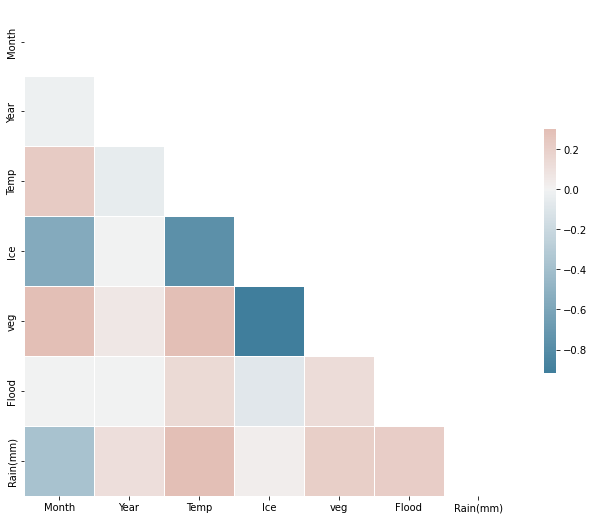

In [64]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [65]:
dfx.count().isnull()

Month       False
Year        False
Temp        False
Ice         False
veg         False
Flood       False
Rain(mm)    False
dtype: bool

c:\Users\wwwkh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


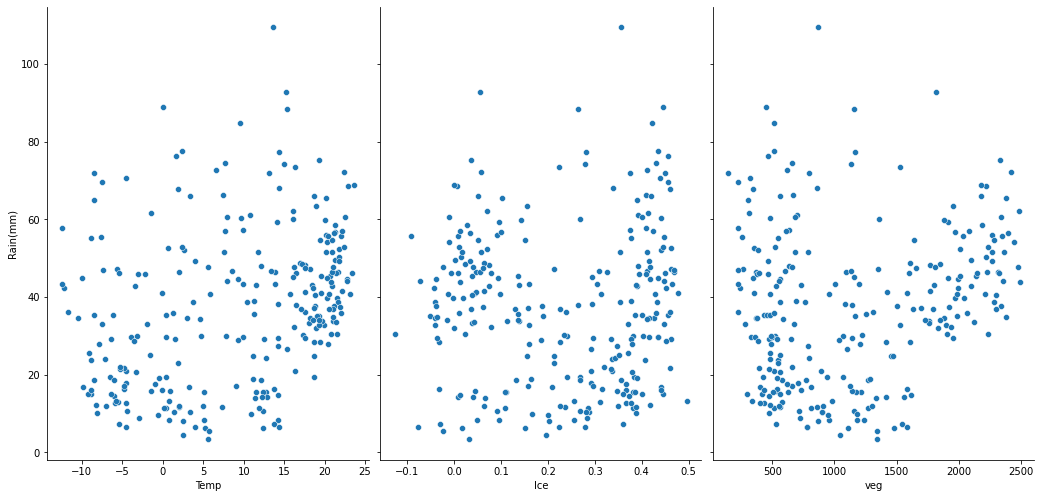

In [66]:
sns.pairplot(dff, x_vars=['Temp','Ice','veg'], y_vars='Rain(mm)', size=7, aspect=0.7)

c:\Users\wwwkh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


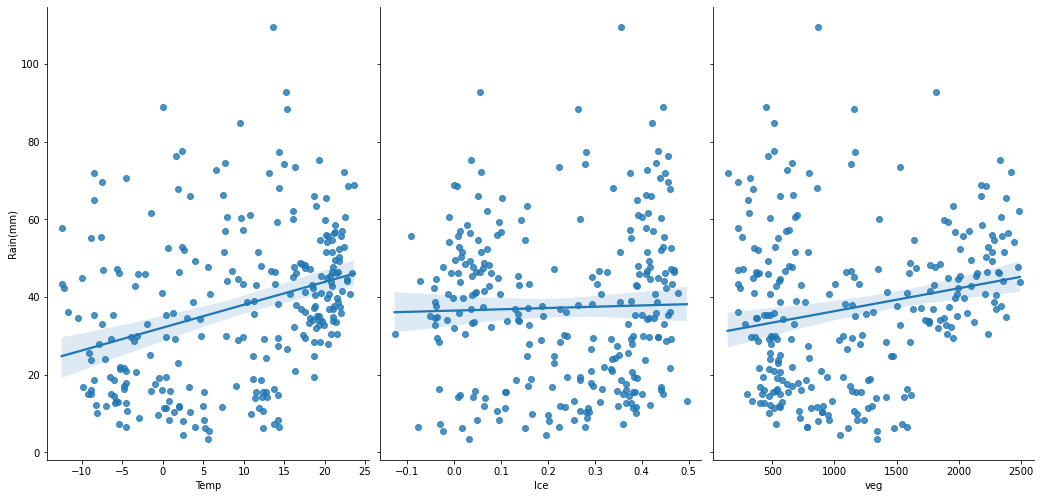

In [67]:
sns.pairplot(dff, x_vars=['Temp','Ice','veg'], y_vars='Rain(mm)', size=7, aspect=0.7, kind='reg')
       

In [68]:
dff.head(24)

,Month,Year,Temp,Ice,veg,Flood,Rain(mm)
index,,,,,,,
2,3,2000,2.981226,0.425839,368.5450,False,34.596
3,4,2000,12.708964,0.381100,626.6595,False,15.639
4,5,2000,19.249516,0.189548,1166.6580,False,35.088
5,6,2000,21.013767,0.111867,1753.9175,False,33.933
6,7,2000,20.867000,0.075194,2098.9790,False,42.868
7,8,2000,21.536474,0.019421,1964.6145,False,39.746
8,9,2000,19.569567,0.044100,1580.4160,False,41.091
9,10,2000,14.247129,0.094806,1178.3880,False,8.442
10,11,2000,3.989600,0.222800,783.3410,False,6.662


In [69]:
dff['Month'].dtype

dtype('int32')